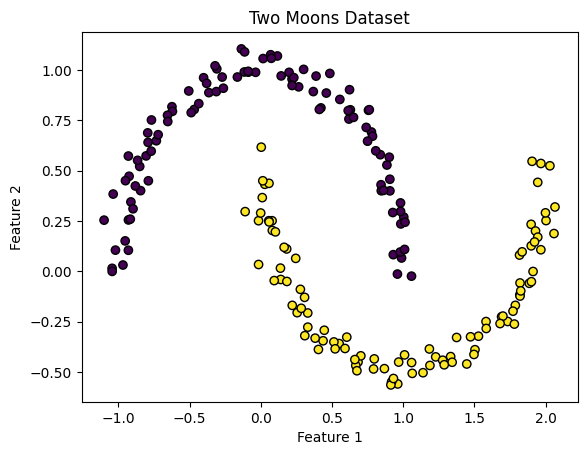

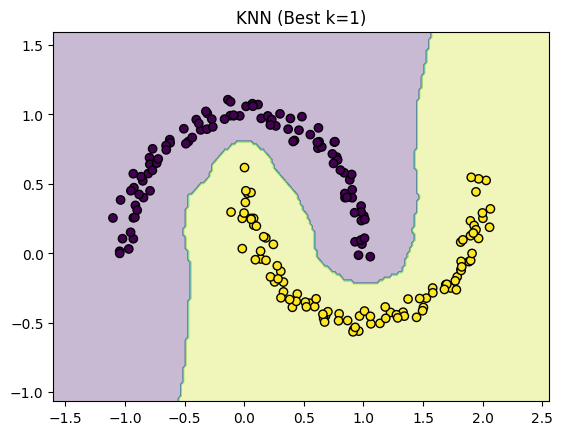

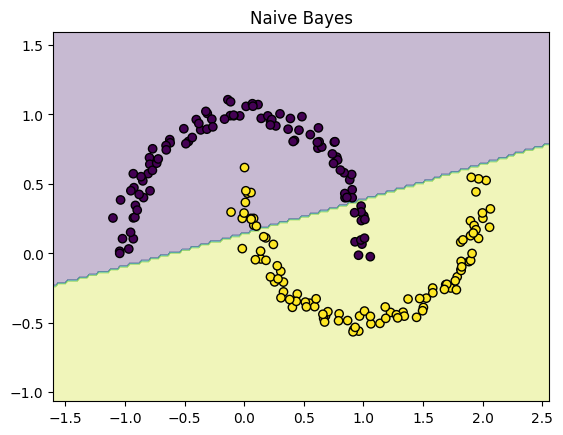

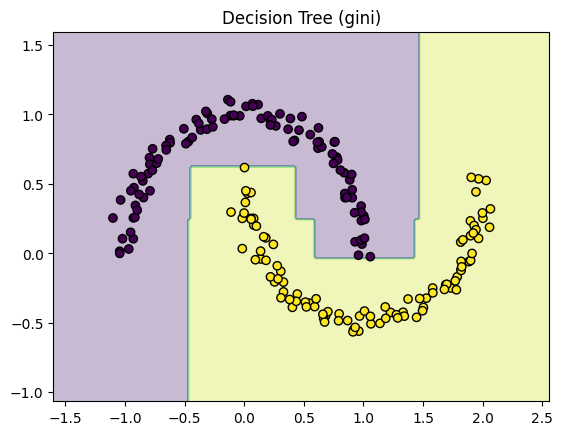

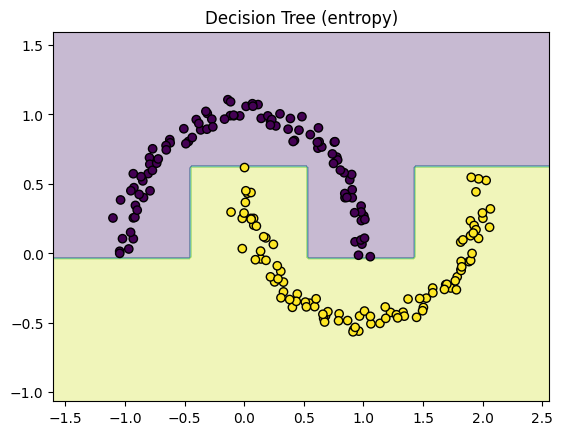

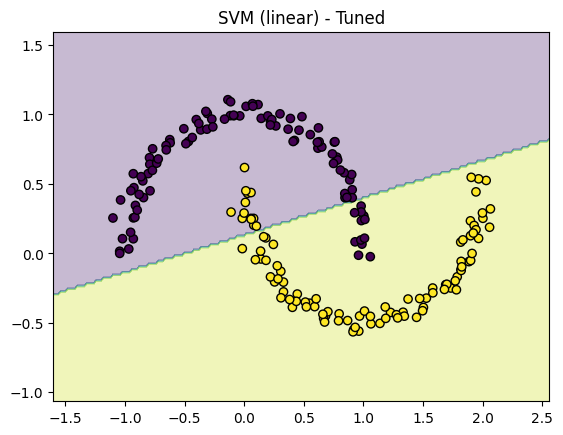

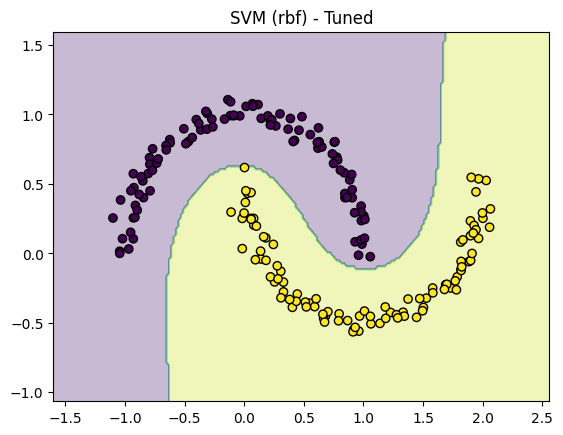

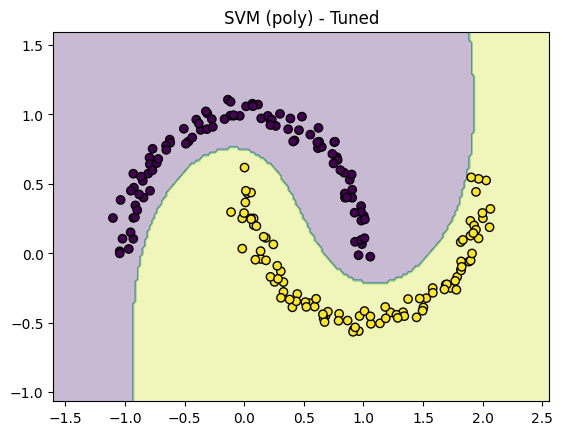

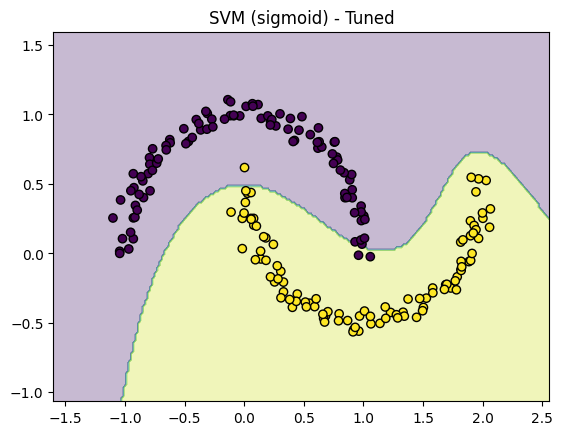


=== Summary of Results ===
Classifier           TP    TN    FP    FN    Precision  Recall     F1        
KNN (k=1)            30    30    0     0     1.00       1.00       1.00      
Naive Bayes          29    28    2     1     0.94       0.97       0.95      
Decision Tree (gini) 30    30    0     0     1.00       1.00       1.00      
Decision Tree (entropy) 30    30    0     0     1.00       1.00       1.00      
SVM (linear)         29    28    2     1     0.94       0.97       0.95      
SVM (rbf)            30    30    0     0     1.00       1.00       1.00      
SVM (poly)           30    30    0     0     1.00       1.00       1.00      
SVM (sigmoid)        30    29    1     0     0.97       1.00       0.98      


In [ ]:
# -*- coding: utf-8 -*-
"""
Project: Two Moons Classification - Azad University Assignment
#Machine Learning Regression Project
#Yadegar-Imam University
#Dr S. Abolfazl Hosseini
#Gathered by Arman Forouharfard using Chat-GPT 5
# Year: 2025
# ============================================================
Description:
    - Generate Two Moons dataset
    - Implement KNN, Naive Bayes, Decision Tree (Entropy/Gini), SVM (4 kernels)
    - Compare models using TP, TN, FP, FN, Precision, Recall, F1
    - Visualize Decision Boundaries
"""

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# =========================
# Step 1: Dataset Generation
# =========================
# Create a synthetic dataset shaped like two interleaving moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# Split dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Plot dataset to visualize the two moons
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Two Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# =========================
# Step 2: Helper Functions
# =========================
def evaluate_model(model, name):
    """Train model, make predictions, and calculate evaluation metrics"""
    model.fit(X_train, y_train)              # Train model
    y_pred = model.predict(X_test)           # Predict on test data
    
    # Confusion matrix gives TP, TN, FP, FN
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate Precision, Recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return {
        'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
        'Precision': precision, 'Recall': recall, 'F1': f1
    }

def plot_decision_boundary(model, title):
    """Plot decision boundary of a classifier"""
    h = 0.02  # Step size for the mesh grid
    
    # Define grid boundaries
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Draw contour map
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.title(title)
    plt.show()

# =========================
# Step 3: Models and Evaluation
# =========================
results = {}

# --- 1. KNN (Auto Best K) ---
# Try different K values (1–20) to find the best number of neighbors
k_values = range(1, 21)
best_k = None
best_acc = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    if acc > best_acc:
        best_acc = acc
        best_k = k

# Train KNN with the best K found
knn_best = KNeighborsClassifier(n_neighbors=best_k)
results[f'KNN (k={best_k})'] = evaluate_model(knn_best, f'KNN (k={best_k})')
plot_decision_boundary(knn_best, f"KNN (Best k={best_k})")

# --- 2. Naive Bayes ---
# Probabilistic classifier based on Bayes' theorem
nb = GaussianNB()
results['Naive Bayes'] = evaluate_model(nb, 'Naive Bayes')
plot_decision_boundary(nb, "Naive Bayes")

# --- 3. Decision Tree (Entropy & Gini) ---
# Train decision trees using both splitting criteria
for criterion in ['gini', 'entropy']:
    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    results[f'Decision Tree ({criterion})'] = evaluate_model(dt, f'Decision Tree ({criterion})')
    plot_decision_boundary(dt, f"Decision Tree ({criterion})")

# --- 4. SVM (4 Kernels with Tuned Parameters) ---
# Define parameter settings for each kernel      #همپوشانی / overlapping     # مرز تصمیم‌گیری/ Decision Tree
svm_params = {
    'linear': {'C': 1, 'gamma': 'scale'},           
    'rbf': {'C': 1, 'gamma': 'scale'},
    #'poly': {'C': 15, 'gamma': 'scale', 'degree': 3},
    'poly' : {'C': 15, 'gamma': 0.5, 'degree': 3, 'coef0': 1},
    #'sigmoid': {'C': 10, 'gamma': 0.3}
    #'sigmoid': {'C': 15, 'gamma': 0.2, 'coef0': -2}
    'sigmoid': {'C': 20, 'gamma': 0.70, 'coef0': -3},
    
    #'linear': {'C': 1, 'gamma': 'scale'},
    #'rbf': {'C': 1, 'gamma': 'scale'},
    #'poly' : {'C': 15, 'gamma': 0.5, 'degree': 3, 'coef0': 1},
    #'sigmoid': {'C': 20, 'gamma': 0.70, 'coef0': -3},
}

# Train and evaluate SVM models with different kernels
for kernel, params in svm_params.items():
    # Remove degree parameter if kernel is not 'poly'
    params = {k: v for k, v in params.items() if not (kernel != 'poly' and k == 'degree')}
    
    svm = SVC(kernel=kernel, random_state=42, **params)
    results[f'SVM ({kernel})'] = evaluate_model(svm, f'SVM ({kernel})')
    plot_decision_boundary(svm, f"SVM ({kernel}) - Tuned")

# =========================
# Step 4: Summary Table
# =========================
# Print all results in tabular format
print("\n=== Summary of Results ===")
print("{:<20} {:<5} {:<5} {:<5} {:<5} {:<10} {:<10} {:<10}".format(
    'Classifier', 'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'F1'))
for model, metrics in results.items():
    print("{:<20} {:<5} {:<5} {:<5} {:<5} {:<10.2f} {:<10.2f} {:<10.2f}".format(
        model, metrics['TP'], metrics['TN'], metrics['FP'], metrics['FN'],
        metrics['Precision'], metrics['Recall'], metrics['F1']))
